#   Extracción de características para reducir la Dimensionalidad


##  ¿Qué aprenderemos hoy?


-   Análisis de Discriminante Lineal (LDA)
-   Reducción de dimensión para visualización
-   Incrustación de vecinos estocásticos -distribuidos ( -SNE)

LDA supone que los datos se distribuyen normalmente. Además, supone que las clases tienen matrices de covarianza idénticas y que las características son estadísticamente independientes entre sí.

Mientras que PCA intenta encontrar los ejes de componentes ortogonales de máxima varianza en un conjunto de datos, el objetivo de LDA es encontrar el subespacio de características que optimiza la separabilidad de las
clases.

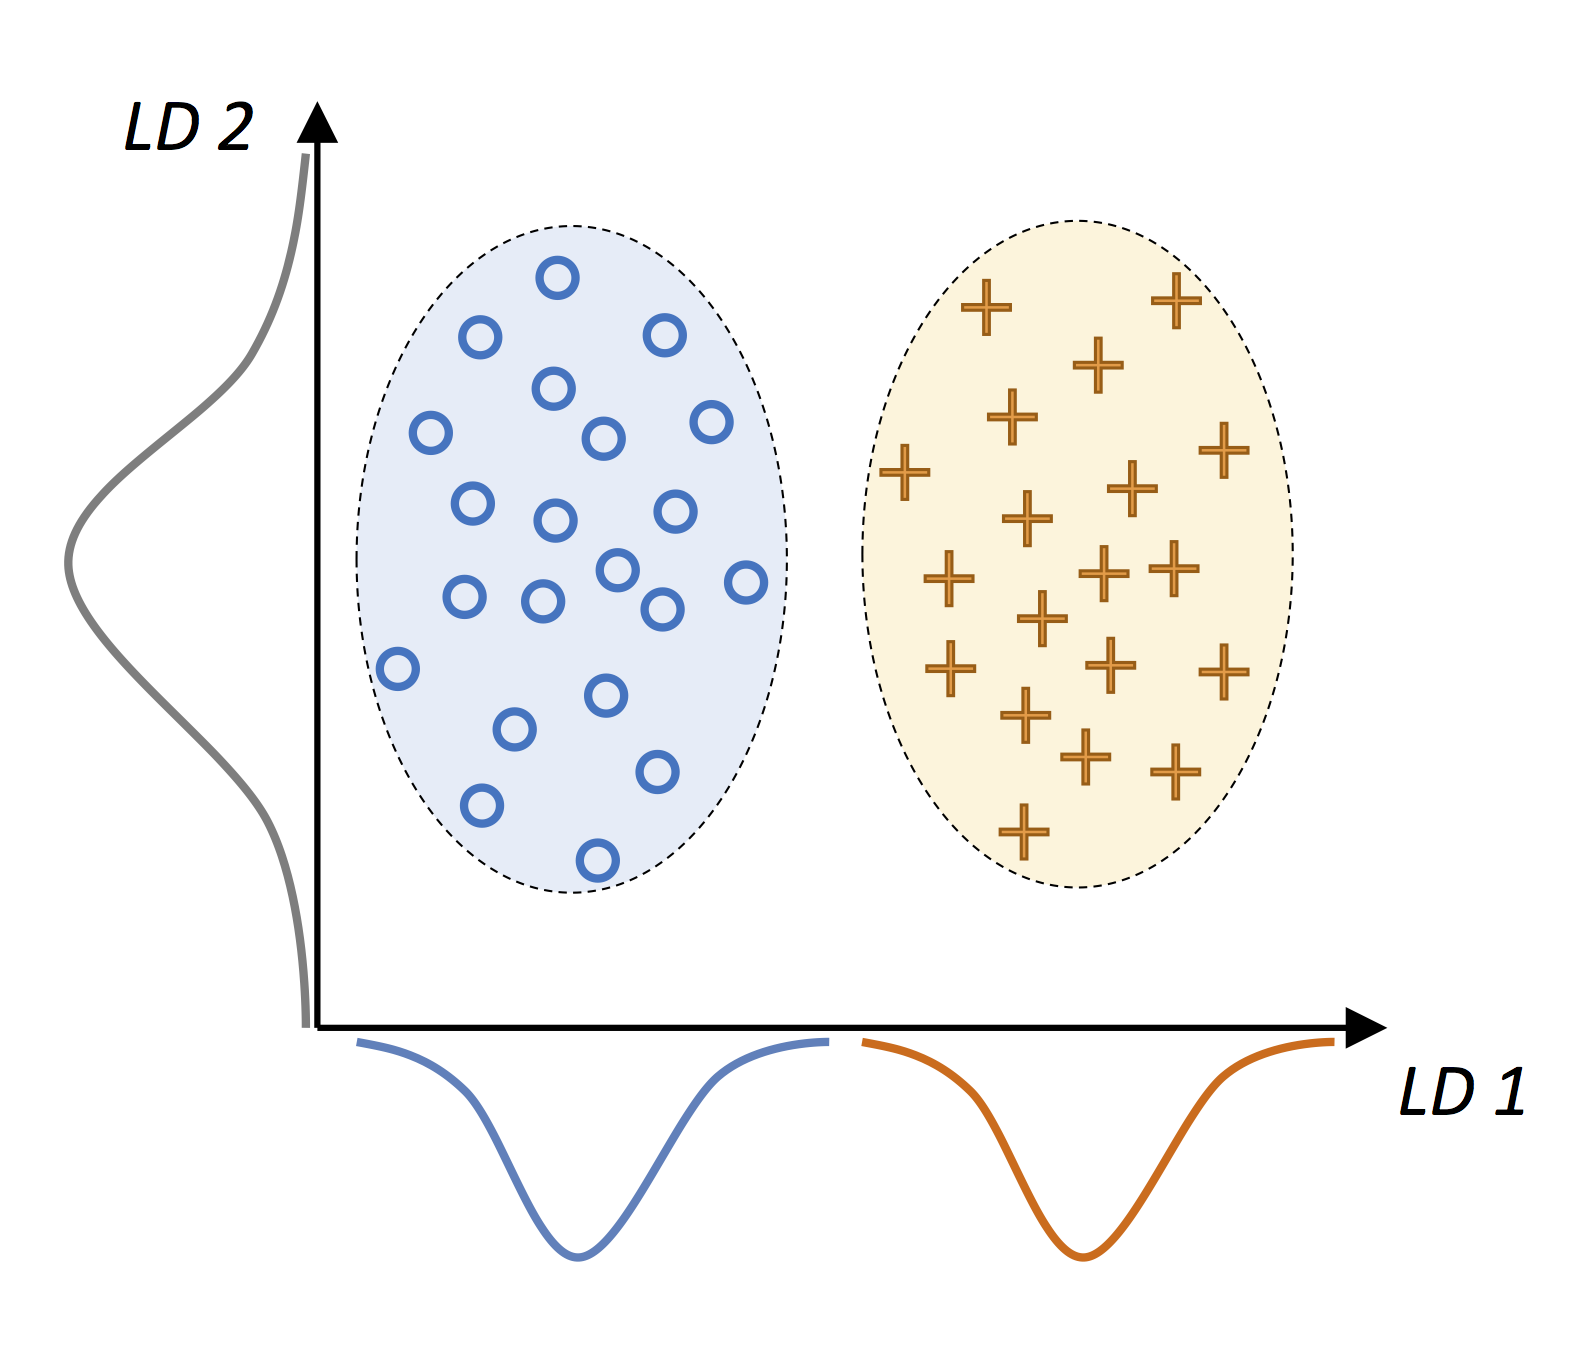

In [3]:
from IPython.display import Image
Image(filename=r'Imagenes_clase_9/Imagenes_clase_9/8_2.png', width=500)

Algoritmo LDA:
1. Normalizar el conjunto de datos -dimensional.
2. Para cada clase, calcular el vector medio -dimensional (centroide).
3. Construir la matriz de dispersión entre clases, , y la matriz de dispersión dentro de la clase, .
4. Calcular los vectores propios y los correspondientes valores propios de la matriz .
5. Ordenar los valores propios por orden decreciente para clasificar los correspondientes vectores propios.
6. Elegir los vectores propios que corresponden a los mayores valores propios, para construir una matriz de transformación -dimensional, (los vectores propios son las columnas de esta matriz).
7. Proyectar las muestras en el nuevo subespacio de características utilizando la matriz de transformación .

##  LDA con Scikit-Learn


In [4]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity',
                     'Hue','OD280/OD315 of diluted wines', 'Proline']
df_wine


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df_wine['Class label'].value_counts()


2    71
1    59
3    48
Name: Class label, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

**Estandarizar**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
import numpy as np
print(f'Dimensiones de X_train_std: {X_train_std.shape}')

Dimensiones de X_train_std: (124, 13)


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [10]:
print(X_train_lda[:10,:])
print(X_train_lda.shape)

[[-2.96463525 -1.15696578]
 [ 3.35009835 -2.07089788]
 [ 3.06163017 -1.09368358]
 [ 2.7329816  -1.49363859]
 [-3.54607454 -0.99220553]
 [ 0.01652658  2.95671405]
 [-0.26521753  3.71080577]
 [-3.35455379 -0.14185328]
 [-0.82788767  1.91824846]
 [-1.47271886  3.92230732]]
(124, 2)


**Actividad 1: Plotear el conjunto x_train en el nuevo espacio de características 2D que genera LDA**

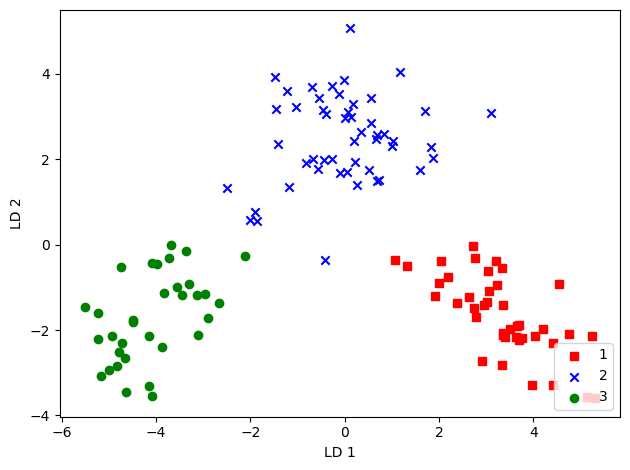

In [11]:
import matplotlib.pyplot as plt
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],X_train_lda[y_train == l, 1],c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()


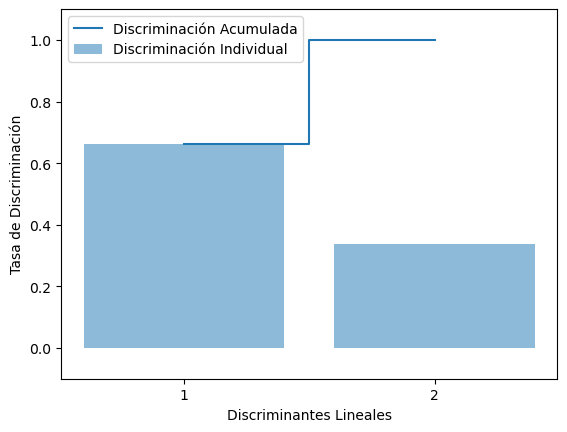

In [12]:
plt.bar(range(1,3), lda.explained_variance_ratio_, alpha=0.5,
        align='center',label='Discriminación Individual',tick_label=[1,2])
plt.step(range(1,3), np.cumsum(lda.explained_variance_ratio_), where='mid',
         label='Discriminación Acumulada')
plt.ylabel('Tasa de Discriminación')
plt.xlabel('Discriminantes Lineales')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()


##  Visualización y reducción no lineal de dimensionalidad
La reducción de dimensionalidad no lineal , también conocida como Manifold Learning , se refiere a varias técnicas relacionadas que tienen como objetivo proyectar datos de alta dimensión en variedades latentes de menor
dimensión, con el objetivo de visualizar los datos en el espacio de baja dimensión o aprender el mapeo ( ya sea desde el espacio de alta dimensión a la incrustación de baja dimensión o viceversa) en sí mismo.

Manifold Learning puede considerarse como un intento de generalizar los algoritmos lineales como PCA para que sean sensibles a la estructura no lineal de los datos. Aunque existen variantes supervisadas, los algoritmos
típicos de este enfoque son de naturaleza No Supervisada, es decir, aprenden la estructura de los datos de alta dimensión a partir de los datos mismos, sin el uso de clasificaciones predeterminadas.


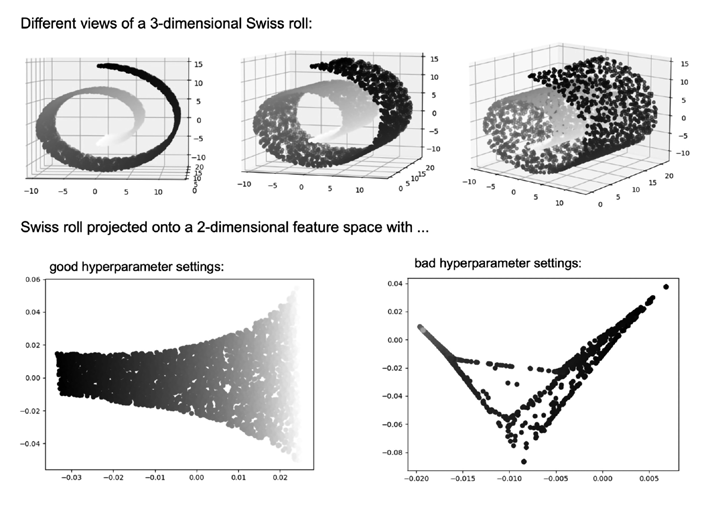

In [14]:
Image(filename=r'Imagenes_clase_9/Imagenes_clase_9/8_3.png', width=600)


##  Incrustación de vecinos estocásticos $t$-distribuidos ( $t$-SNE)


La incrustación de vecinos estocásticos -distribuidos ( $t$-SNE) es un método estadístico para visualizar datos de alta dimensión al otorgar a cada punto de datos una ubicación en un mapa de dos o tres dimensiones.

En pocas palabras, $t$-SNE modela puntos de datos en función de sus distancias por pares en el espacio de características de alta dimensión (original). Luego, encuentra una distribución de probabilidad de distancias por pares
en el nuevo espacio de menor dimensión que es cercana a la distribución de probabilidad de distancias por pares en el espacio original. En otras palabras, $t$-SNE aprende a incrustar puntos de datos en un espacio de menor
dimensión de modo que se conserven las distancias por pares del espacio original.

$t$-SNE convierte afinidades de puntos en probabilidades. Las afinidades en el espacio original están representadas por probabilidades conjuntas gaussianas y las afinidades en el espacio incrustado están representadas por
distribuciones de Student. Esto permite que -SNE sea particularmente sensible a la estructura local.
El algoritmo t-SNE comprende dos etapas principales:
1. -SNE construye una distribución de probabilidad sobre pares de objetos de alta dimensión de tal manera que a los objetos similares se les asigna una probabilidad más alta, mientras que a los puntos diferentes se les
asigna una probabilidad más baja.
2. $t$-SNE define una distribución de probabilidad similar sobre los puntos en el mapa de baja dimensión y minimiza (utilizando el descenso de gradiente) la divergencia Kullback-Leibler (divergencia KL) entre las dos
distribuciones con respecto a las ubicaciones de los puntos en el mapa.
La divergencia KL no es convexa, por lo que a veces es útil probar diferentes semillas y seleccionar la incrustación con la divergencia KL más baja.
Algunas ventajas sobre las técnicas tradicionales:
Revela la estructura oculta en algunos datos.
Revela datos que se encuentran en múltiples o en diferentes grupos.
Reduce la tendencia a juntar puntos en el centro.
Las desventajas de usar -SNE son:
-SNE es computacionalmente costoso y puede tomar varias horas en conjuntos de datos de millones de muestras, donde PCA terminaría en segundos o minutos.
El algoritmo es estocástico y múltiples ejecuciones con diferentes semillas pueden generar diferentes incrustaciones. Sin embargo, es conveniente elegir la incrustación con el menor error.
La estructura global no se conserva explícitamente. Este problema se mitiga inicializando puntos con PCA (usando init='pca').

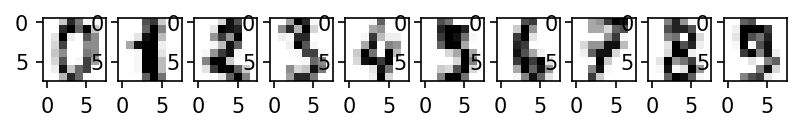

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(1, 10,dpi=150)
for i in range(10):
    ax[i].imshow(digits.images[i], cmap='Greys')
# plt.savefig('figures/05_12.png', dpi=300)
plt.show()

In [16]:
digits.data.shape


(1797, 64)

In [17]:
y_digits = digits.target
X_digits = digits.data

In [18]:
y_digits


array([0, 1, 2, ..., 8, 9, 8])

##  $t$-SNE con Scikit-Learn


In [19]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])

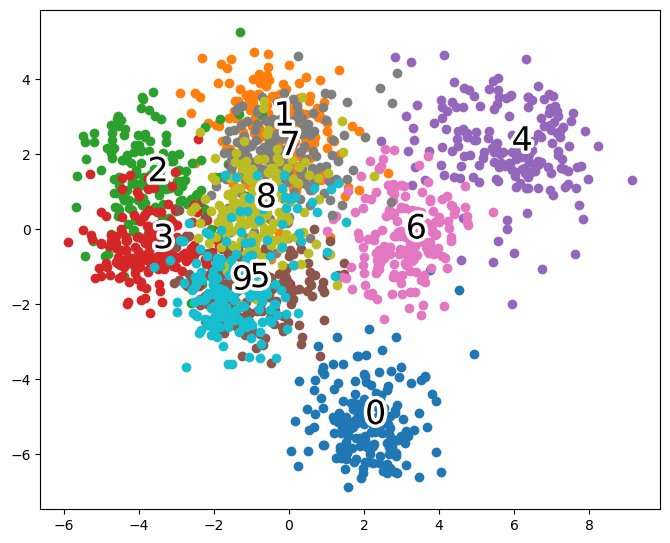

In [20]:
lda = LDA(n_components=2)
X_digits_lda = lda.fit_transform(X_digits, y_digits)
plot_projection(X_digits_lda, y_digits)
plt.show()

##  Actividad 2: Realizar el ejercicio anterior, utilizando PCA.


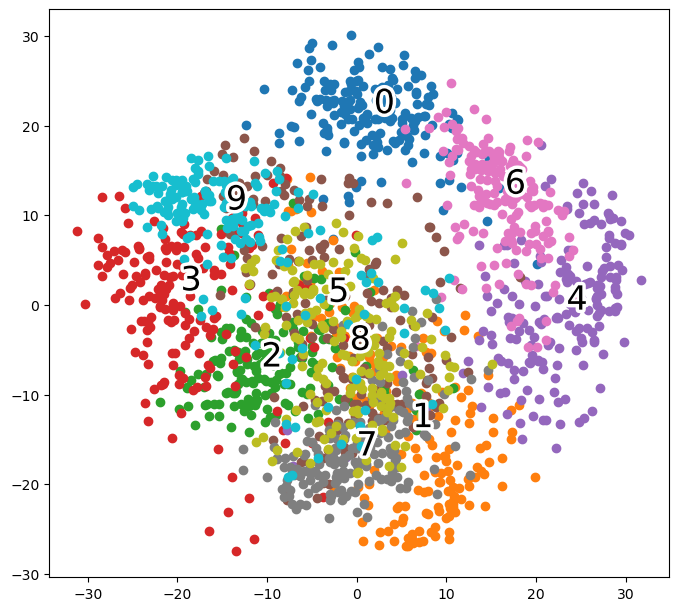

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_digits_pca = pca.fit_transform(X_digits)
plot_projection(X_digits_pca, y_digits)
plt.show()

c:\Users\newma\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\newma\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


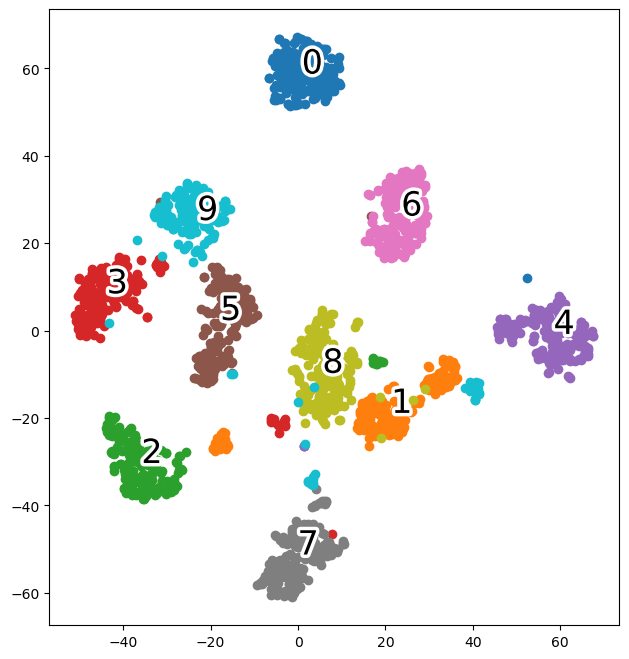

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init='pca',random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)
plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()